# On choirs and maths

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sinewave(freq, phase, sr = 440e3):
    ts = 1.0/sr    
    t = np.arange(0,5,ts)

    tds = np.sin(2*np.pi*freq*t + phase)


    fds = np.fft.fft(tds)
    N = len(fds)
    n = np.arange(N)
    f = sr*n/N

    return t, tds, f, fds

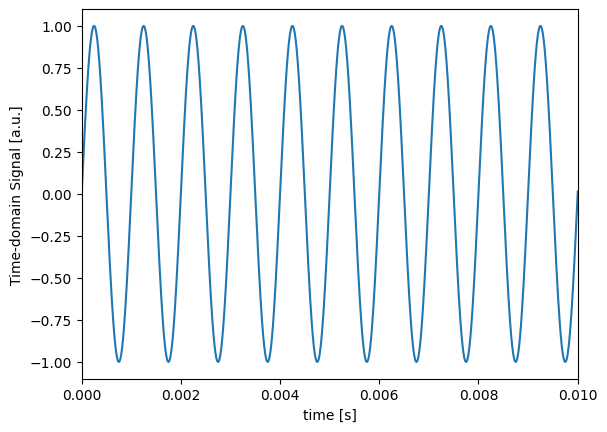

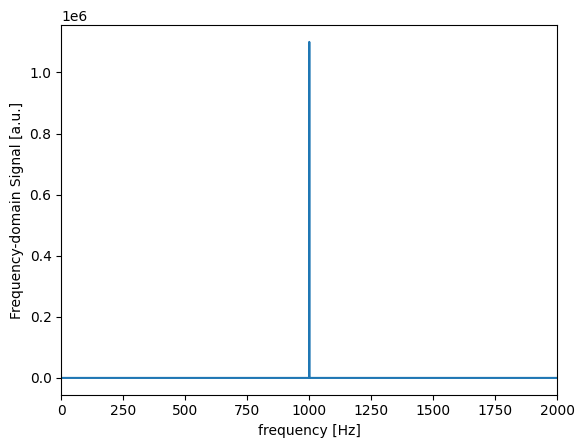

In [3]:
freq = 1e3
phase = 0

t, tds, f, fds = sinewave(freq, phase)

plt.figure()
plt.plot(t, tds)
plt.xlabel("time [s]")
plt.ylabel("Time-domain Signal [a.u.]")
plt.xlim(0, 10/freq)

plt.figure()
plt.plot(f, np.abs(fds))
plt.xlabel("frequency [Hz]")
plt.ylabel("Frequency-domain Signal [a.u.]")
plt.xlim(0, 2*freq)

plt.show()

# Pure overtones

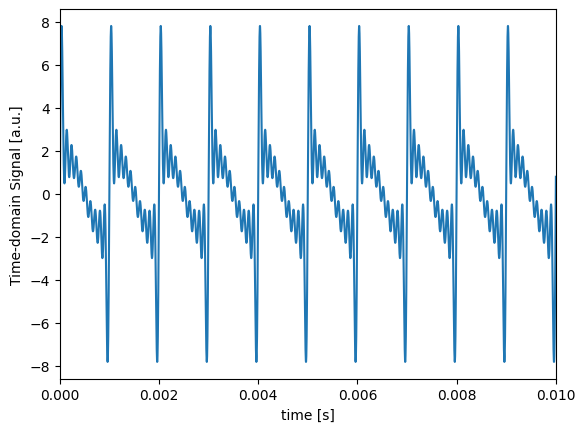

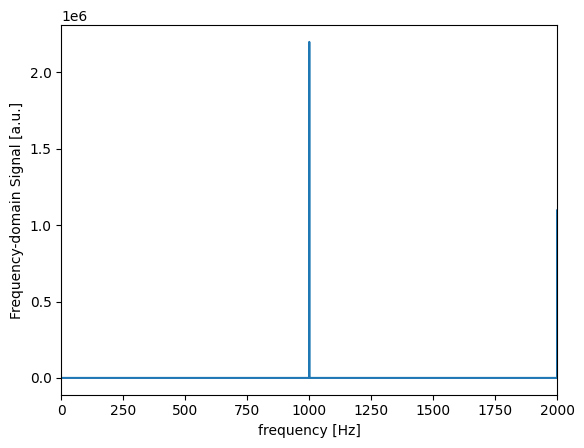

In [4]:
freq = 1e3
phase = 0
N_overtones = 10

signal = None
for n in range(1,N_overtones+1):
    if signal is None:
        signal = tds

    t, tds, f, fds = sinewave(n*freq, phase)
    signal += tds

signal_fft = np.fft.fft(signal)


plt.figure()
plt.plot(t, signal)
plt.xlabel("time [s]")
plt.ylabel("Time-domain Signal [a.u.]")
plt.xlim(0, 10/freq)

plt.figure()
plt.plot(f, np.abs(signal_fft))
plt.xlabel("frequency [Hz]")
plt.ylabel("Frequency-domain Signal [a.u.]")
plt.xlim(0, 2*freq)
plt.show()

# Adding Frequency Noise


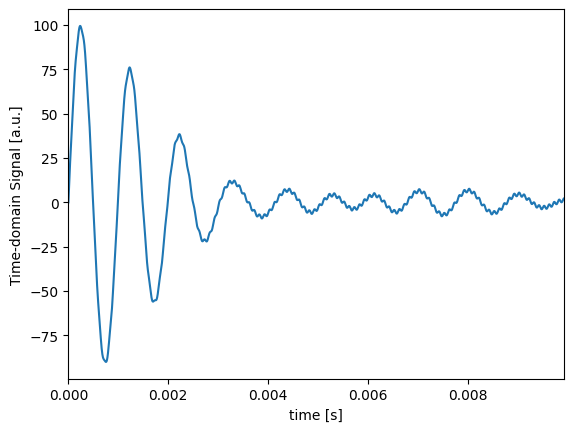

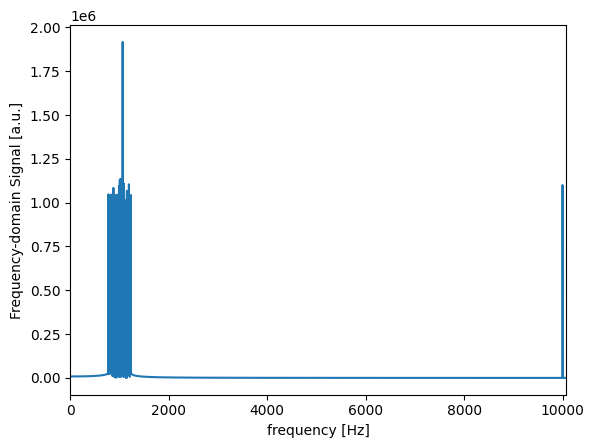

In [5]:
freq = 1e3
variation = 0.1*freq
N_voices = 100
random_frequencies = np.random.normal(freq,variation,N_voices)

signal = None
for freq in random_frequencies:
    if signal is None:
        signal = tds

    t, tds, f, fds = sinewave(freq, phase)
    signal += tds

signal_fft = np.fft.fft(signal)


plt.figure()
plt.plot(t, signal)
plt.xlabel("time [s]")
plt.ylabel("Time-domain Signal [a.u.]")
plt.xlim(0, 10/freq)

plt.figure()
plt.plot(f, np.abs(signal_fft))
plt.xlim(0,10*freq)
plt.xlabel("frequency [Hz]")
plt.ylabel("Frequency-domain Signal [a.u.]")

plt.show()

# Adding Phase Noise

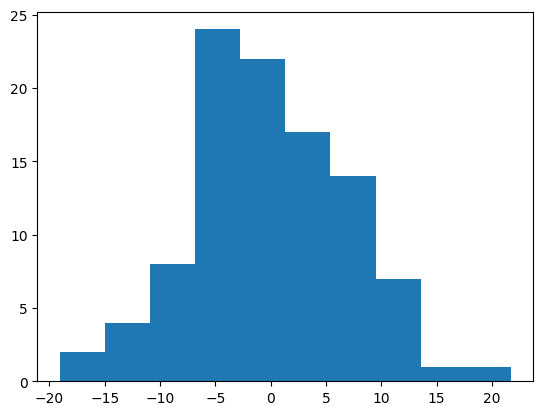

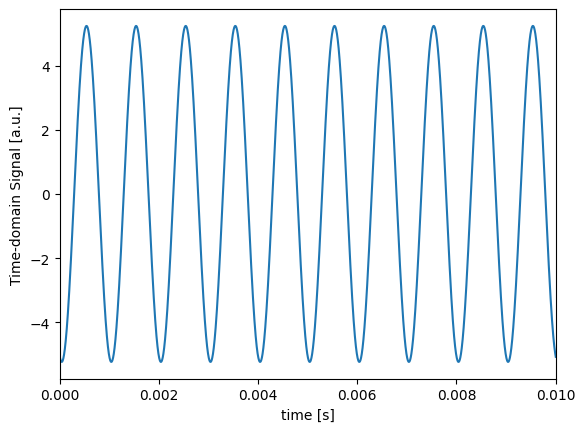

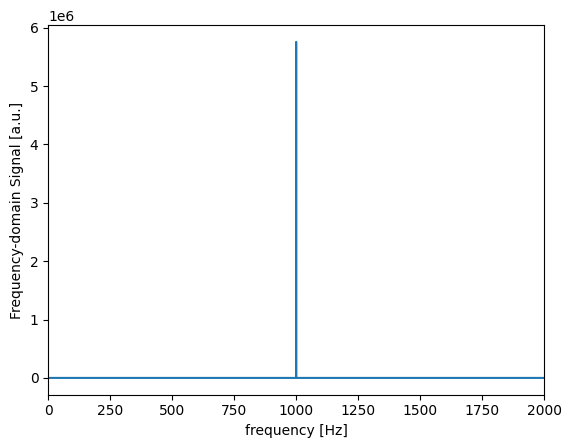

In [8]:
freq = 1e3
N_voices = 100

phase = 0
variation = 0.05*freq
random_phases = np.random.normal(phase,2*np.pi,N_voices)

plt.figure()
plt.hist(random_phases)

signal = None
for phase in random_phases:
    if signal is None:
        signal = tds

    t, tds, f, fds = sinewave(freq, phase)
    signal += tds

signal_fft = np.fft.fft(signal)

plt.figure()
plt.plot(t, signal)
plt.xlabel("time [s]")
plt.ylabel("Time-domain Signal [a.u.]")
plt.xlim(0, 10/freq)

plt.figure()
plt.plot(f, np.abs(signal_fft))
plt.xlim(0,2*freq)
plt.xlabel("frequency [Hz]")
plt.ylabel("Frequency-domain Signal [a.u.]")

plt.show()

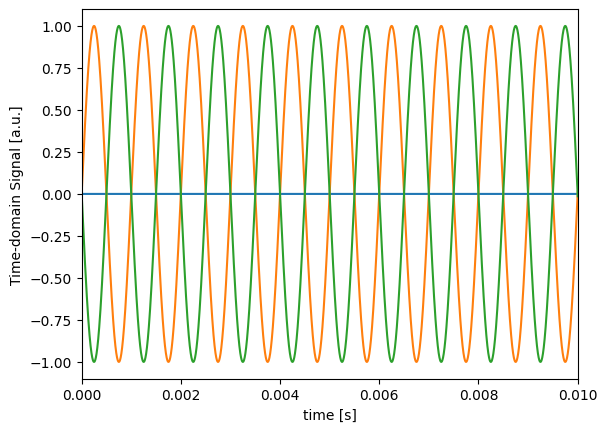

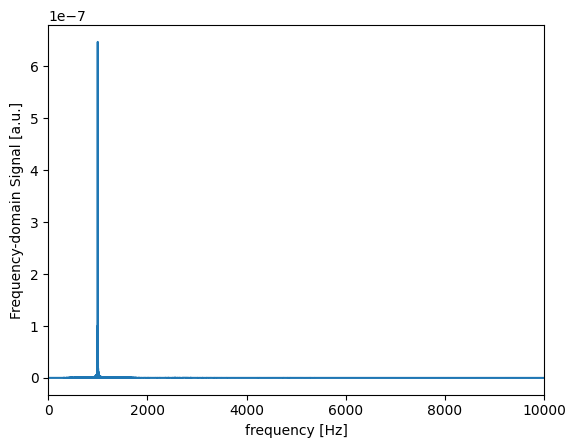

In [7]:
freq = 1e3
N_voices = 100

t, tds1, f, fds = sinewave(freq, 0)
t, tds2, f, fds = sinewave(freq, np.pi)

signal = tds1 + tds2

signal_fft = np.fft.fft(signal)


plt.figure()
plt.plot(t, signal)
plt.plot(t, tds1)
plt.plot(t, tds2)
plt.xlabel("time [s]")
plt.ylabel("Time-domain Signal [a.u.]")
plt.xlim(0, 10/freq)

plt.figure()
plt.plot(f, np.abs(signal_fft))
plt.xlim(0,10*freq)
plt.xlabel("frequency [Hz]")
plt.ylabel("Frequency-domain Signal [a.u.]")

plt.show()